# Astronomy 8824 - Numerical and Statistical Methods in Astrophysics

## Numerical Methods Topic I. Integration

These notes are for the course Astronomy 8824: Numerical and Statistical Methods in Astrophysics. It is based on notes from David Weinberg with modifications and additions by Paul Martini.
David's original notes are available from his website: http://www.astronomy.ohio-state.edu/~dhw/A8824/index.html

#### Background reading: 
- Numerical Recipes, Chapter 4

LaTex macros hidden here -- 
$\newcommand{\half}{{\textstyle{1\over2}}}$
$\newcommand{\third}{{\textstyle{1\over3}}}$
$\newcommand{\twothird}{{\textstyle{2\over3}}}$
$\newcommand{\fourthird}{{\textstyle{4\over3}}}$

In [1]:
import math
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# matplotlib settings 
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('lines', linewidth=2)
plt.rc('axes', linewidth=2)
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

### Numerical Integration and Quadrature

The term quadrature in mathematics refers to the determination of the area. This dates to ancient times, when mathematicians treated the determination of the area as equivalent to the construction of a square of the same area. As integration determines the area under a curve, quadrature is still used as a term for numerical integration.

Numerical integration is a great tool for several circumstances. One is obviously integrals that can not be solved analytically. Yet sometimes they are the best solution for integrals that do have analytic solutions. For example, if the analytic solution is a special function, or is represented by an infinite series. 

### Connection to Differentiation

The solution of integrals and the solution of derivatives have deep connections, and the numerical methods to solve both integrals and differential equations are very similar. And in some cases, methods for numerical integration may be used to solve differential equations (and vice versa). 

To see this, consider that the solution of 
$$
I=\int_a^b f(x) dx.
$$
is equivalent to solving the ordinary differential equation
$$
{dy \over dx} = f(x)
$$
with boundary condition $y(a)=0$ for $y(b)$.


Here is a simple example
$$
f(x) = m x + c
$$

$$
I = \int^b_a f(x) dx = \int^b_a (m x + c) dx = \half m x^2 + c x |^b_a
$$
and compare this to  $I \equiv y(b)$ when $y(a) = 0$. In this case:
$$
{dy \over dx} = f(x) = m x + c
$$
$$
y = \int {dy \over dx} dx = \int (m x + c) dx = \half m x^2 + cx
$$
If the boundary condition $y(a) = 0$, then 
$$
y(b) = \half m b^2 + c b = I.
$$ 


#### Euler Method

The simplest method is the Euler Method: 
$$
S^{Eul}_N = \sum_{i=1}^{N} f(x_i) h_N,
$$
where $N$ is the number of (equal-sized) integration steps and
$$
h_N = {b-a \over N},\qquad x_i = a + (i-1)h_N.
$$

This is a bad method. The error per step is $O(h^2)$ and the error of the integral is $O(h)$.  It can drift systematically from the correct result.

Here is a geometric example for the simple function 
$$
I = \int^5_1 x^2 dx
$$ 
where we know the exact solution is 
$$
F(x) = {x^3 \over 3} |^5_1 = {125 \over 3} - {1 \over 3} = 41.33333
$$

Euler method evaluation with 4 steps finds I = 30.0000


Text(0, 0.5, 'Y')

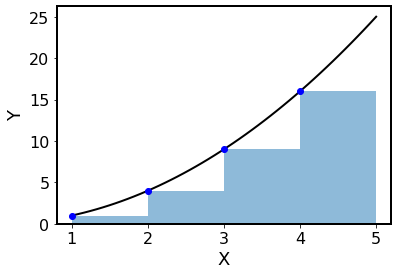

In [2]:
def func(x):
    return x*x

a = 1
b = 5

# Smooth plot
xs = np.linspace(a, b, 50)
ys = func(xs)

# Euler with 4 steps
nstep = 4
hstep = (b-a)/nstep
x = np.linspace(a, b-hstep, nstep)
y = func(x)
print("Euler method evaluation with {} steps finds I = {:.4f}".format(nstep, np.sum(y)*hstep))

# Plot
plt.plot(xs, ys, 'k')
plt.plot(x, y, 'bo')
plt.bar(x, y, width=hstep, align='edge', ecolor='blue', alpha=.5)
plt.xlabel("X")
plt.ylabel("Y")

The Euler method is summing the filled area, and clearly this is not working well. It is particularly egregious for this case, where the function is monotonically increasing. 

### Newton-Cotes formulas

Newton-Cotes formulas are a class of formulas for numerical integration that involve the evaluation of the function at equally spaced points or abscissas ("x" coordinate, as opposed to the "y" coordinate or ordinate). These are split into two varieties: closed formulas that include the end points of the integral, and open formulas that do not. They are named after Isaac Newton and Roger Cotes. 


#### Trapezoidal Rule


The Trapezoidal Rule is: 
$$
\int^{x_2}_{x_1} f(x) dx = \left[ \half f_1 + \half f_2 \right] h + O(h^3 f'') 
$$
and is known as a two-point function. It performs a linear fit to the function, and is much better than the Euler method. Note that the error in the method depends on the stepsize as $h^3$ and the derivative $f''$, although the coefficient is not specified. This method will be exact for 1st order (linear) functions with $f'' = 0$. 

We can decrease the stepsize for the Trapezoidal Rule by applying this equation N-1 times on points ($x_1, x_2$), ($x_2, x_3$), ..., ($x_{N-1}, x_N$) that extend across the interval. Summation of these individual applications leads to the extended version of the Trapezoidal Rule: 

$$
S^{Trap}_N = \left[ \half f_1 + f_2 + f_3 + ... + f_{N-1} + \half f_N \right] h_N
$$

$$
S^{Trap}_N =
  \sum_{i=1}^{N} \left[ \half f(x_i) + \half f(x_{i+1})\right] h_N.
$$

The Trapezoidal Rule can also be written:
$$
S^{Trap}_N = \sum_{i=1}^N \left[\half f(x_i) + \half f(x_{i+1})\right] h_N =
    \half\left[f(x_1)+f(x_{N+1})\right]h_N + \sum_{i=2}^N f(x_i) h_N,
$$
Note that for a stepsize $h_N = \frac{b-a}{N}$, there are $N+1$ points across the interval ($a,b$).

The Trapezoidal Rule requires no more function calls than the Euler Method. There is consequently no reason to use the Euler Method for numerical integration.

Note also that it is straightforward to conduct automatic tolerance control by continuing to double $N$ and checking if 
$|S_N/S_{N/2}-1| < {\tt TOL}$. Also, the term tolerance is used to measure the convergence on *an answer*. This is not necessarily the correct answer!

#### Simpson's Rule 

Simpson's Rule is a 3-point method. This suggests it should be exact for polynomials up to second order; however, due to a lucky cancellation it is also exact up to third order. Here is the formula: 

$$
\int^{x_3}_{x_1} f(x) dx = \left[ \third f_1 + \fourthird f_2 + \third f_3 \right] h + O(h^5 f^{(4)}) 
$$

Since there are three points across the interval ($a,b$), the interval size is $2h$. 

Just like for the Trapezoidal Rule, one can apply Simpson's Rule to successive groups (of three points) to create an extended version: 

$$
S^{Simp}_{N} = \int^{x_N}_{x_1} f(x) dx = \left[ \third f_1 + \fourthird f_2 + \twothird f_3 + ... + \twothird f_{N-2}+ \fourthird f_{N-1} + \third f_N \right] h_N + O(h^4_N f^{(4)})
$$

As with the Trapezoidal Rule, it is valuable to successively increase the number of points and test for convergence. If you continue to double the number of points, you can take advantage of the fact that 0.5 times the previous iteration is all of the odd terms in the trapezoid sum, and only the even (intermediate) terms need to be calculated. That is:

$$
S^{Simp}_{N} = \fourthird S^{Trap}_N - \third S^{Trap}_{N/2}
$$

There are also four-point, five-point, and other formulas (e.g. see NR), although Simpson's Rule is a fairly reliable workhorse. 

#### Note on Roundoff Error

In single-precision, roundoff error is $\sim 10^{-6}$. This means the error in a number like $y=1.0 + 10^{-6}$ is 100\%.

If you are adding up $10^6$ numbers of similar order, result can be way off if roundoff error is biased. Even if unbiased, roundoff error in the sum is $\gg 10^{-6}$. And the situation is worse if numbers are of different order.

What are the implications? The main one is that reducing number of steps is important for accuracy, and not just speed.

You should always be cautious if adding $>10^4$ numbers in single precision. If you need to do this, consider using double precision where the roundoff is $\sim 10^{-14}$. Note also that 32-bit integer arithmetic is like single precision.


#### Midpoint Rule

The Midpoint Rule is an example of an open Newton-Cotes formula. The main virtue of this rule is that it does not require evaluation at the end points, so it is good for integrals that are undefined at an endpoint, but are integrable. Here is the Extended Midpoint Rule.

$$
S^{Mid}_N = \left[ f_{3/2} + f_{5/2} + ... + f_{N-3/2} + f_{N-1/2} \right] h_N + O(h^2) 
$$

$$
S^{Mid}_N = \sum_{i=1}^N f(x_{i+1/2}) h_N
$$

This is a second-order method, like the Trapezoidal Rule. Note that the sum to $N$ is correct because of the definition of $x_i$:  $x_{N+1/2} = b-h_N/2.$ Unfortunately you can't use doubling trick to get Simpson's rule.

Here is an example for: 
$$
\int_2^{10}{ dx \over (x-2)^{1/2}} ~.
$$

/apps/python/3.7-2019.10/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


Text(0, 0.5, 'Y')

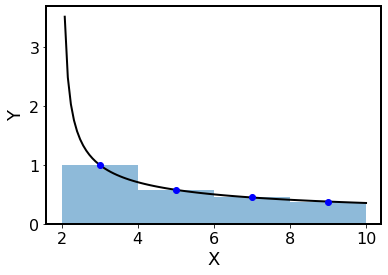

In [3]:
def func2(x):
    return 1/np.sqrt(x - 2)

a = 2
b = 10
xs = np.linspace(a, b, 100)
ys = func2(xs)

# Midpoint with 4 steps
nstep = 4
hstep = (b-a)/nstep
x = np.linspace(a+hstep/2, b-hstep/2, nstep)
y = func2(x)
#print("Euler method evaluation with {} steps finds I = {:.4f}".format(nstep, np.sum(y)*hstep))

# Plot
plt.plot(xs, ys, 'k')
plt.plot(x, y, 'bo')
plt.bar(x, y, width=hstep, align='center', ecolor='blue', alpha=.5)
plt.xlabel("X")
plt.ylabel("Y")

# Note this complains about divison by zero because I asked it for the function value at a = 2

### Transformation of Variables

Transformation of variables is a hugely valuable trick for many applications. One key application is for numerical integration of improper integrals, namely those with limits of $-\infty$ or $\infty$.  

For example, consider the substitution $t=1/x$,
$$
\int_a^b f(x) dx = \int_{1/b}^{1/a} {1\over t^2} f\left({1 \over t}\right)dt.
$$

A second application is to reduce the variation of the integrand, for example to make it similar in each interval $dx$. This will make the integrand much better matched to methods that are based on equally spaced abscissas. If this is not done, then the required size of $h$ is set by most rapidly varying region of the integrand, yet tiny steps are still being taken (and wasted) in regions where the integrand is varying slowly.

Here is an example of this second application. The substitution $y = \ln x$ shows that
$$
\int_1^{1000} \left(x+{1\over x}\right)^{-1} dx
$$
is equivalent to
$$
\int_0^{{\rm ln}1000} \left(1+e^{-2y}\right)^{-1} dy.
$$
The second integral can be evaluated with many fewer steps because the integrand changes significantly when $x$ changes by a constant factor rather than a constant interval $\Delta x$.

It is sometimes necessary/useful to break an integral into two or three parts, with different variable substitutions, to deal with improper integration boundaries or with different regimes of integrand behavior.

### Other Methods

The Trapezoid, Midpoint, and Simpson's Rules are robust methods that work well for general cases, when they are fast enough. If you need higher accuracy for given amount of CPU time (or less CPU for given accuracy), more sophisticated
methods can be significantly faster. Two such methods are Romberg Integration and Gaussian quadrature. 

#### Romberg Integration (a.k.a Richardson extrapolation) 


Romberg integration combines the Extended Trapezoidal Rule with Richardson extrapolation to generate higher order methods. The method uses successive refinements of this rule to eliminate progressively higher order error terms. That is, one performs the integration to various values of $h$, fits a polynomial to the results, and then extrapolates to $h = 0$. This method works great for smooth integrands, but is significantly less robust than Trapezoid, Midpoint, and Simpson's Rules, it is important to understand the integrand before adopting this method. 

#### Gaussian quadrature:

The Newton-Cotes methods are all based on equally-spaced abscissas combined with some weighting coefficients. The higher-order methods generally have more carefully chosen weighting coefficients. Gaussian quadrature allows for not just changes in the weighting coefficients, but also in the location of the abscissas -- that is, they will no longer be equally spaced. Very generally, the integral is approximated as: 

$$
I \approx w_1 f(x_1) + w_2 f(x_2) + w_3 f(x_3) + ...
$$

And the idea is to choose the weights to make the approximation exact for 

$$
\int_a^b W(x) f(x) dx,
$$

where $f(x)$ is a polynomial of a given degree, $W(x)$ is
a weighting function.

With twice the number of degrees of freedom (location of abscissas, in addition to weighting coefficients), Gaussian quadrature formulas can be twice as good as Newton-Cotes methods with the same number of function evaluations. Yet the downside is that it is a lot of work to figure out where to optimally place the abscissas, and the corresponding weights. Fortunately many standard cases have been worked out already, and this method can be much more efficient for smooth integrands that need to be evaluated many times at high accuracy. 

### Multi-dimensional Integrals

Multi-dimensional integrals can become hard very quickly. If $N$ is number of steps needed per dimension, the total
number of function evaluations scales as $N^D$.

You should always attempt to reduce dimensionality of the integration whenever possible by using the symmetries of problem.

For an integral with a simple boundary and a smooth integrand, you can recursively use 1-d integration. An example case is: 

$$
\int\int\int dx\,dy\,dz\, f(x,y,z) =
\int_{x_1}^{x_2} dx \int_{y_1(x)}^{y_2(x)} dy
\int_{z_1(x,y)}^{z_2(x,y)} dz \,f(x,y,z).
$$

If you cannot analytically solve for, e.g., $z_1(x,y)$, you can choose a larger volume and set $f(x,y,z)=0$ outside the integration region (if you have some test on $(x,y,z)$ that tells you when you are in that region).

If so, be careful of losing accuracy at the boundaries, where the value of $f$ changes discontinuously.

You may want to use numerical root finding (discussed later in the course) to find the inner limits, $z_1(x,y)$, $z_2(x,y)$, etc.

For more complicated boundaries with a smooth integrand, and if high accuracy is not required, you can do Monte Carlo integraion (see NR $\S 7.6$). The basic idea is to choose a volume $V$ that encloses integration region, e.g., a cube, and choose $N$ random points that evenly sample this volume. Then sum the values of the function $f({\bf x})$ at points ${\bf x}$ that lie within the integration region, setting $f({\bf x})=0$ outside that region.

The problem then becomes the volume integral
$$
\int f({\bf x}) dV \approx \sum f({\bf x}_i) \times V/N~,
$$
where $V$ is your enclosing volume, and each point is representing a volume $dV = V/N$.

An estimate of the error is:
$$
\pm V \left({\langle f^2 \rangle - \langle f \rangle^2 \over N}\right)^{1/2}
$$
where
$$
\langle f \rangle = {1 \over N} \sum_{i=1}^N f({\bf x}_i), \qquad
\langle f^2 \rangle = {1 \over N} \sum_{i=1}^N f^2({\bf x}_i) ~.
$$


### Decision Tree for Algorithms

1. Always start by graphing the function. Is it smooth? Differentiable? Can you solve it analytically??

2. Does it have an integrable singularity at a limit? If yes, use an open method. Otherwise use a closed method.

3. Is there an integrable singularity at one or more points along the interval? If yes, break it up into multiple intervals.

4. Is it smooth? Does it have no singularities and nonsingular endpoints? If yes, then Romberg integration is probably best. 

5. Is it an improper integral? For example, it may be singular at a limit, but otherwise okay (e.g. $\frac{sin x}{x}$ at $x=0$), or $\infty$ at a limit, or have integrable singularities at a limit or some other (known or unknown) location. In these cases, consider changing variables and/or using open methods. 

### Python Routines

There are many python numerical integration routines in scipy.integrate, including implementations of most of these methods. 

In [4]:
import scipy
import scipy.integrate

In [5]:
# List the contents of this package 
scipy.integrate?

Type:        module
String form: <module 'scipy.integrate' from '/apps/python/3.7-2019.10/lib/python3.7/site-packages/scipy/integrate/__init__.py'>
File:        /apps/python/3.7-2019.10/lib/python3.7/site-packages/scipy/integrate/__init__.py
Docstring:  
Integration and ODEs (:mod:`scipy.integrate`)

.. currentmodule:: scipy.integrate

Integrating functions, given function object

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose n-dimensional integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   quad_explain  -- Print information for use of quad
   newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
   Integ

In [6]:
# Specifically import four functions to use: 
from scipy.integrate import trapz, simps, romb, quad

Here is one of the integrals from the homework:
$$
\int^{100}_1 \frac{sin x}{x} dx
$$

Text(0.5, 1.0, 'sin x / x')

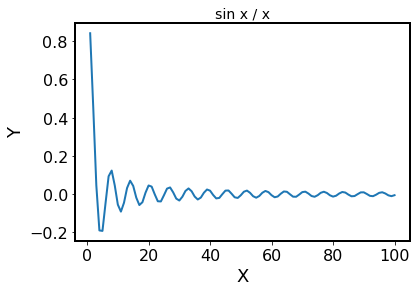

In [7]:
def func3(x):
    return np.sin(x)/x

a = 1.
b = 100.

# It is always a good idea to plot a function before integating -- 
xs = np.linspace(a, b, 100)
ys = func3(xs)
plt.plot(xs, ys)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("sin x / x")

In [8]:
# What is the machine precision? 
np.finfo(float).eps

2.220446049250313e-16

Quadrature value is 0.6161423965218733 with uncertainty 3.4127631329063506e-14


/apps/python/3.7-2019.10/lib/python3.7/site-packages/ipykernel/__main__.py:2: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  from ipykernel import kernelapp as app


Text(0, 0.5, 'log (I - Iexact)/Iexact')

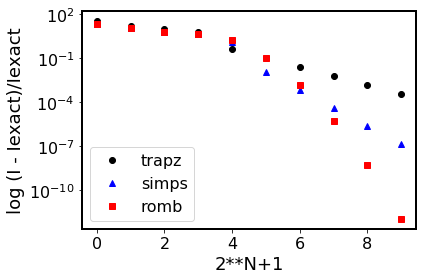

In [9]:
# Use quad as the 'exact' value
Iquad = quad(func3, a, b, epsabs=50.*np.finfo(float).eps, epsrel=50.*np.finfo(float).eps)
print("Quadrature value is {0} with uncertainty {1}".format(Iquad[0], Iquad[1]))
Iexact = Iquad[0]

# Look at convergence:
num = range(10)
Itrap = np.zeros(len(num))
Isimps = np.zeros(len(num))
Iromb = np.zeros(len(num))

for i, N in enumerate(num):
    nsteps = np.power(2, N+1) + 1
    x = np.linspace(a, b, nsteps)
    y = func3(x)
    Itrap[i] = trapz(y, x=x)
    Isimps[i] = simps(y, x=x)
    Iromb[i] = romb(y, x[1]-x[0])    
    
plt.plot(num, np.fabs(Itrap-Iexact)/Iexact, 'ko', label='trapz')
plt.plot(num, np.fabs(Isimps-Iexact)/Iexact, 'b^', label='simps')
plt.plot(num, np.fabs(Iromb-Iexact)/Iexact, 'rs', label='romb')
plt.legend()
plt.yscale('log')
plt.xlabel("2**N+1")
plt.ylabel("log (I - Iexact)/Iexact")